In [46]:
# !pip install nlp
# !pip install tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp as nlp
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# import random

# Setup 

In [10]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history['loss'], label='train')
    plt.plot(range(0, epochs_trained), h.history['val_loss'], label='validation')
    plt.title('Loss')
    plt.title('Epochs')
    plt.legend()
    plt.show()
    
def show_confusion_matrix(y_true, y_pred, classes): 
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm, cmap=plt.cm.Blues)
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.yticks(range(len(classes)), classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.colorbar(ctx)
    plt.show()
    
    print('Using tensorflow version', tf.__version__)
    

# Importing data
- Importing tweet emotion dataset
- Creating train, validation, and test sets
- Extracting tweets and labels from the examples


In [14]:
# investigate datasets
from nlp import list_datasets
datasets_list = list_datasets()
print(', '.join(dataset.id for dataset in datasets_list))

nvidia/OpenMathReasoning, OpenGVLab/InternVL-Data, nvidia/OpenCodeReasoning, nvidia/Nemotron-CrossThink, Eureka-Lab/PHYBench, rajpurkarlab/ReXGradient-160K, Anthropic/values-in-the-wild, deepseek-ai/DeepSeek-ProverBench, fka/awesome-chatgpt-prompts, nvidia/dynpose-100k, openai/gsm8k, Rapidata/text-2-image-Rich-Human-Feedback-32k, nvidia/describe-anything-dataset, syCen/CameraBench, nyuuzyou/svgfind, gaia-benchmark/GAIA, open-r1/OpenR1-Math-220k, zwhe99/DeepMath-103K, nvidia/When2Call, Amod/mental_health_counseling_conversations, Kaichengalex/RealSyn100M, future-technologies/Universal-Transformers-Dataset, FreedomIntelligence/medical-o1-reasoning-SFT, Congliu/Chinese-DeepSeek-R1-Distill-data-110k, LLM360/MegaMath, Giova-tech/sentiment-analysis-test, nvidia/Llama-Nemotron-Post-Training-Dataset, qwertychri/sentiment-analysis-test, a-m-team/AM-DeepSeek-Distilled-40M, wikimedia/wikipedia, HuggingFaceFW/fineweb, Aleph-Alpha/Aleph-Alpha-GermanWeb, Felipeit/sentiment-analysis-test, Riccardosch

In [ ]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

train_set = dataset['train']
test_set = dataset['test']
validation_set = dataset['validation']

# # print the first ten indicies
# print(train_set[0:10])
# print(test_set[0:10])
# print(validation_set[0:10])
# print(dataset)


{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy', 'ive been feeling a little burdened lately wasnt sure why that was', 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny', 'i feel as confused about life as a teenager or as jaded as a year old man', 'i have been with petronas for years i feel that petronas has performed well and made a huge profit', 'i feel romantic too'], 'label': [0, 0, 3, 2, 3, 0, 5, 4, 1, 2]}
{'text': ['im feeling rather rotten so im not very ambitious right now', 'im updating my blog because i feel shitty', 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her', 'i left with my bouqu

# Load data and extract features and labels


In [41]:
####################################################
# Extract the features and labels from the dataset 
####################################################
def get_data(data): 
    features = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return features, labels

####################################################
# Map labels 
####################################################
# Rename labels
label_mapping = {
    0: "Sadness",
    1: "Joy",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Surprise",
}


features, pre_proccessed_labels = get_data(train_set)

# Replace numeric values with word labels
def map_labels(labels_data): 
    return [label_mapping[pre_proccessed_labels] for pre_proccessed_labels in labels_data]

# Apply function
labels = map_labels(pre_proccessed_labels)

# Tokenizing the data

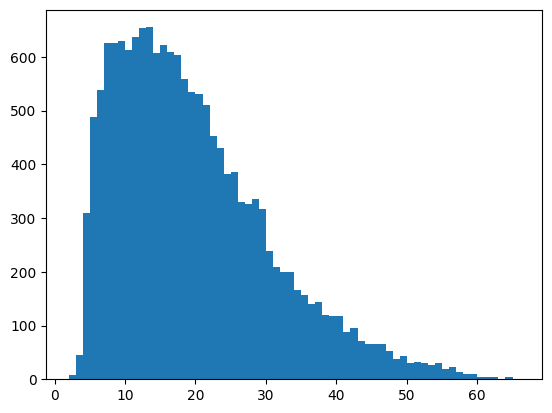

In [ ]:
####################################################
# Vocabulary builder 
####################################################

# Keep only the 10,000 most frequently used words in the dataset and ignore less frequent words --> reduce dictionary size 
# Represent out of vocabulary words with <UNK>
tokenizer = Tokenizer(num_words = 10000, oov_token = '<UNKNOWN>')

# Build the vocab for the tokenizer based on the features data 
tokenizer.fit_on_texts(features)

#  convert strings to integers based on the vocab built above 
tokenizer.texts_to_sequences([features])

####################################################
# Pad sequences 
####################################################
# Get the length of each text in features, split it by spaces 
lengths = [len(text.split (' ')) for text in features] 
plt.hist(lengths, bins = len(set(lengths)))

# Set a max length of 60 because it looks like outliers beyond that, and pad them with zeroes. 
maxlen = 60

# Define function to get sequences for different sets 
def get_sequences(tokenizer, features): 
    sequences = tokenizer.texts_to_sequences(features) # get sequences
    padded = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen = maxlen) # truncate at the end of the sequence, if our sequence length is < maxlen the last 10 elements will be added with padding
    return padded 

# Pad sequences for the training set
padded_train_seq = get_sequences(tokenizer, features)


# Prepare the labels 

{'Anger', 'Surprise', 'Sadness', 'Fear', 'Love', 'Joy'}


array([2, 2, 0, ..., 5, 0, 2])

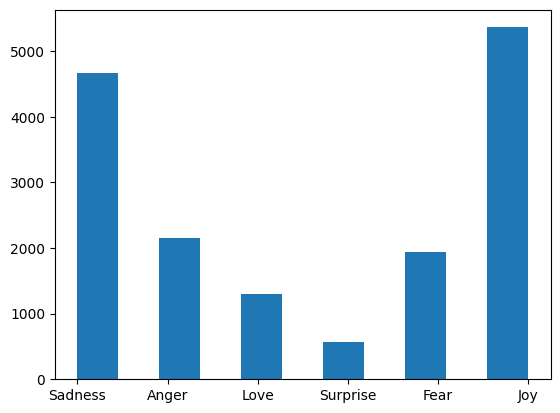

In [60]:
####################################################
# Visualise frequency of emotion from tweets
# # Note: worth investigating how we can adress the imbalance of classes in the future 
####################################################

classes = set(labels) # create unordered collection of unique elements (remove duplicates)
print(classes)
plt.hist(labels, bins = len(classes) + 5) # +5 to add some space between the bars

####################################################
# Create a dictionary to map class names to numeric values
####################################################

class_to_index = dict((c, i) for i, c in enumerate(classes)) # Key = Class name, Value = Numeric representation. Enumerate over the classes to get the index and class name.
index_to_class = dict((i, c) for i, c in enumerate(classes)) # Key = Numeric representation, Value = Class name. Enumerate over the classes to get the index and class name.

# use lambda because we need to convert labels to numeric values in multple places 
names_to_ids = lambda labels: np.array([class_to_index[label] for label in labels]) # Convert the labels to their numeric representation using the dictionary above.
train_labels = names_to_ids(labels) # Convert the labels to their numeric representation using the dictionary above.
train_labels

# Training the model 